### Artificial Neural Networks: Multi Layer Perceptron Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cleandata.csv", index_col='datetime', parse_dates=True)

In [3]:
df.head()

,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dfc = df.copy()
dfc.head()

,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
dfc

,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [6]:
dummy_season = pd.get_dummies(dfc.season, prefix='season')

In [7]:
dummy_season.sample(n=10,random_state = 12)

,season_1,season_2,season_3,season_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,0,0,0,1
2012-12-08 17:00:00,0,0,0,1
2011-06-10 17:00:00,0,1,0,0
2011-08-13 09:00:00,0,0,1,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,0,0,1,0
2011-12-17 16:00:00,0,0,0,1


In [8]:
dummy_weather = pd.get_dummies(dfc.weather, prefix='weather')
dummy_weather.sample(n=10, random_state = 12)

,weather_1,weather_2,weather_3,weather_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,1,0,0,0
2012-12-08 17:00:00,1,0,0,0
2011-06-10 17:00:00,1,0,0,0
2011-08-13 09:00:00,0,1,0,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,1,0,0,0
2011-12-17 16:00:00,1,0,0,0


In [9]:
dummy_hour = pd.get_dummies(dfc.hour, prefix='hour')
dummy_hour.sample(n=10, random_state = 12)

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-10 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-11-05 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2012-12-08 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-06-10 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-08-13 09:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-04 05:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-12-17 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
dfc = pd.concat([dfc, dummy_hour], axis=1)
dfc = pd.concat([dfc, dummy_weather], axis=1)
dfc = pd.concat([dfc, dummy_season], axis=1)

In [11]:
dfc.head(10)

,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,1,0,0,1,9.02,13.635,80,0.0000,8,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,2,1,0,0,1,9.02,13.635,80,0.0000,5,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,3,1,0,0,1,9.84,14.395,75,0.0000,3,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,4,1,0,0,1,9.84,14.395,75,0.0000,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,5,1,0,0,2,9.84,12.880,75,6.0032,0,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,6,1,0,0,1,9.02,13.635,80,0.0000,2,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,7,1,0,0,1,8.20,12.880,86,0.0000,1,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,8,1,0,0,1,9.84,14.395,75,0.0000,1,...,0,0,1,0,0,0,1,0,0,0


In [12]:
dfc.drop(['hour','season','weather','atemp','casual','registered'], axis = 1, inplace=True)

In [13]:
dfc.head(20)

,holiday,workingday,temp,humidity,windspeed,rentals,hour_0,hour_1,hour_2,hour_3,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,81,0.0000,16,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,0,0,9.02,80,0.0000,40,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,0,0,9.02,80,0.0000,32,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,0,0,9.84,75,0.0000,13,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,0,0,9.84,75,0.0000,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,0,0,9.84,75,6.0032,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,0,0,9.02,80,0.0000,2,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,0,0,8.20,86,0.0000,3,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,0,0,9.84,75,0.0000,8,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [14]:
dfc.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'rentals',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [15]:
X = dfc[['temp','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23','weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4']]

In [16]:
X.columns

Index(['temp', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

## Scaling the Features using STD SCALER

In [17]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X) # Standardization Technique

In [18]:
y = dfc[['rentals']]

In [19]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=100)

# Base Model Building Using sklearn.neural_network library

In [21]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(25), max_iter=300, random_state = 0) 
regressor.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=25, learning_rate='constant',
             learning_rate_init=0.001, max_iter=300, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [22]:
predicted = regressor.predict(X_test)
predicted

array([ 78.85326538, 398.5410613 ,   9.84570777, ...,  47.5283079 ,
       478.20279359,  80.59493365])

# MAE

In [23]:
metrics.mean_absolute_error(y_test,predicted)

61.24389752927231

# MSE

In [24]:
metrics.mean_squared_error(y_test,predicted)

7916.411871144722

# RMSE

In [25]:
np.sqrt(metrics.mean_squared_error(y_test,predicted))

88.97422026151577

### MLP using GridSearch Cross Calidation
##### Hyper Parameter Tuning   
We can calculate the best parameters for the model using “GridSearchCV”. The input parameters 
for the GridSearchCV method are
 
1. The MLP model
2. A parameter dictionary in which we define various hidden layers, activation units, learning rates.

It trains the model and finds the best parameter.

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV # Cross Validation Technique: Grid Search 
mlpregressor = MLPRegressor(random_state=1, max_iter=100) # Create a base regressor
mlpregressor.fit(X_train,y_train) 
mlpregressor


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=100, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
# Parameter Dictionary in which we define various parameters:
check_parameters = {
    'hidden_layer_sizes': [(24),(24,12), (24,12,6)],
    'activation': ['logistic','tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [28]:
# Create variable gridsearchcv and feed in the necessary inputs:
gridsearchcv = GridSearchCV(mlpregressor, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train) # Fit the model to the training dataset.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=100,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_stat...m',
                                    tol=0.0001, validation_fraction=0.1,
                                    verbose=False, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh'],
                         'alpha': [0.0001, 0.05],
                         'hidden_la

In [29]:
print('Best parameters found:\n', gridsearchcv.best_params_)

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 24, 'learning_rate': 'constant', 'solver': 'sgd'}


In [30]:
mlpregressor1 = MLPRegressor(activation='logistic', alpha=1e-4, hidden_layer_sizes=(24), learning_rate='constant', solver='sgd', max_iter=400, random_state=1,verbose=10)
mlpregressor1.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 11431.62521916
Iteration 2, loss = 4636.12418005
Iteration 3, loss = 4339.61980685
Iteration 4, loss = 4185.42462349
Iteration 5, loss = 4139.66201619
Iteration 6, loss = 4104.32859391
Iteration 7, loss = 4041.54682616
Iteration 8, loss = 4021.56458683
Iteration 9, loss = 4002.30147250
Iteration 10, loss = 3982.18698978
Iteration 11, loss = 3977.12178518
Iteration 12, loss = 3957.58659273
Iteration 13, loss = 3952.32563359
Iteration 14, loss = 3927.00265617
Iteration 15, loss = 3932.26373837
Iteration 16, loss = 3914.44643928
Iteration 17, loss = 3910.86151121
Iteration 18, loss = 3892.72448096
Iteration 19, loss = 3890.82625317
Iteration 20, loss = 3879.88959900
Iteration 21, loss = 3877.62108189
Iteration 22, loss = 3870.34981922
Iteration 23, loss = 3864.19976334
Iteration 24, loss = 3866.43864420
Iteration 25, loss = 3854.46550695
Iteration 26, loss = 3848.34920500
Iteration 27, loss = 3847.45401460
Iteration 28, loss = 3844.53997188
Iteration 29, loss = 3831.45

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=24, learning_rate='constant',
             learning_rate_init=0.001, max_iter=400, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=10, warm_start=False)

In [31]:
predicted1 = mlpregressor1.predict(X_test)
predicted1

array([ 75.48755088, 411.6595911 ,   1.03594485, ...,  62.93741913,
       463.10982202,  78.91077423])

## Performance Evaluation of Optimal Model

In [32]:
print(metrics.mean_absolute_error(y_test,predicted1))
print(metrics.mean_squared_error(y_test,predicted1))
print(np.sqrt(metrics.mean_squared_error(y_test,predicted1)))

60.944146937987924
7850.291059357814
88.6018682611028


In [33]:
new_df=y_test.copy()
new_df['pred']=predicted1
new_df=new_df.sort_index()
new_df

,rentals,pred
datetime,,
2011-01-01 01:00:00,40,34.253565
2011-01-01 03:00:00,13,0.973513
2011-01-01 12:00:00,84,199.031693
2011-01-01 21:00:00,34,113.224108
2011-01-01 22:00:00,28,75.958735
...,...,...
2012-12-19 04:00:00,7,2.613338
2012-12-19 10:00:00,164,176.299769
2012-12-19 17:00:00,562,462.957490


C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Value of Bike Rental')

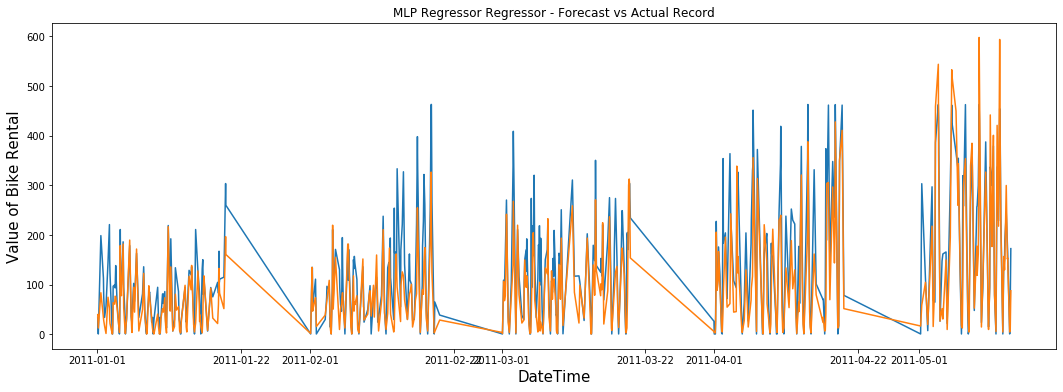

In [34]:
plt.figure(figsize=(18, 6))
plt.plot(new_df['pred'][0:500])
plt.plot(new_df['rentals'][0:500])
plt.title('MLP Regressor Regressor - Forecast vs Actual Record')
plt.xlabel('DateTime',fontsize=15)
plt.ylabel('Value of Bike Rental',fontsize=15)